# Multilatération TDOA pour la localisation d'avions

Soit un réseau de stations au sol $r_i$ de coordonnées $(x_i, y_i, z_i)$ connues et un émetteur $e$ de coordonnées $(x_e, y_e, z_e)$ que l'on souhaite localiser. On note $d_i$ la distance entre la station $r_i$ et l'émetteur $e$.

$$d_i = \sqrt{(x_i-x_e)^2 + (y_i-y_e)^2 + (z_i-z_e)^2}$$

En prenant pour référence la station $r_1$ et en notant $\tau_i$ le délai entre l'instant de réception à la station $r_1$ et celui à la station $r_i$

$$d_i = d_1 + c\tau_i$$

Ce qui implique que

$$d_i^2 - d_1^2 = (d_1 + c\tau_i)^2 - d_1^2\\
= 2 d_1 c \tau_i + c^2 \tau_i^2 $$

Or, on connait une autre expression de $d_i^2 - d_1^2$ obtenue en développant $d_i$ (version distance euclidienne)

$$ d_1^2 = x_1^2 - 2 x_1 x_e + x_e ^ 2 + y_1^2 - 2 y_1 y_e + y_e ^ 2 + z_1^2 - 2 z_1 z_e + z_e ^ 2$$
$$ d_i^2 = x_i^2 - 2 x_i x_e + x_e ^ 2 + y_i^2 - 2 y_i y_e + y_e ^ 2 + z_i^2 - 2 z_i z_e + z_e ^ 2$$

$$ d_i^2 - d_1^2 =  x_i^2 - 2 x_i x_e + x_e ^ 2 + y_i^2 - 2 y_i y_e + y_e ^ 2 + z_i^2 - 2 z_i z_e + z_e ^ 2 - (x_1^2 - 2 x_1 x_e + x_e ^ 2 + y_1^2 - 2 y_1 y_e + y_e ^ 2 + z_1^2 - 2 z_1 z_e + z_e ^ 2)\\
= x_i^2 + y_i^2 + z_i^2
- x_1^2 - y_1^2 - z_1^2
- 2 (x_i-x_1) x_e
- 2 (y_i-y_1) y_e
- 2 (z_i-z_1) z_e $$

On a donc

$$2 d_1 c \tau_i + c^2 \tau_i^2 = x_i^2 + y_i^2 + z_i^2
- x_1^2 - y_1^2 - z_1^2
- 2 (x_i-x_1) x_e
- 2 (y_i-y_1) y_e
- 2 (z_i-z_1) z_e \\

\Leftrightarrow c^2 \tau_i^2 - x_i^2 - y_i^2 - z_i^2 + x_1^2 + y_1^2 + z_1^2 = 
-2 (
 (x_i-x_1) x_e
+  (y_i-y_1) y_e
+ (z_i-z_1) z_e
+ c \tau_i d_1)

$$

Il est ainsi possible d'écrire le problème de la localisation de $e$ sous la forme d'un système d'équations linéaires

$$

-2

\begin{bmatrix}
x_2 - x_1 & y_2 - y_1 & z_2 - z_1 & c \tau_2\\
\dots & \dots & \dots\\
x_n - x_1 & y_n - y_1 & z_n - z_1 & c \tau_n\\
\end{bmatrix}


\begin{bmatrix}
x_e \\
y_e \\
z_e \\
d_1 \\
\end{bmatrix}

=

\begin{bmatrix}
c^2 \tau_2^2 - x_2^2 - y_2^2 - z_2^2 + x_1^2 + y_1^2 + z_1^2\\
\dots \\
c^2 \tau_n^2 - x_n^2 - y_n^2 - z_n^2 + x_1^2 + y_1^2 + z_1^2\\
\end{bmatrix}

$$

## Implémentation en Python

L'implémentation gère les cas 2D et 3D, modifier n_dim selon votre préférence (pas d'affichage si 3D)

In [1]:
n_dim = 2 # 2: 2D, 3:3D

#### Prérequis

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [3]:
from scipy.constants import c

#### Paramètres du problème

In [4]:
n_stations = 5
prec_timestamp = (1./2.4e6)

In [5]:
np.random.seed(64) # Répétabilité

if n_dim == 2: # 2D
    stations_pos = np.random.rand(n_stations, 2) * 10000
    plane_pos = np.array([4500, 4500])
elif n_dim == 3: # 3D
    stations_pos = np.random.rand(n_stations, 3) * 10000
    plane_pos = np.array([4500, 4500, 15000])
else:
    raise Exception("Nombre de dimensions invalide, 2D ou 3D uniquement !")


distances = np.linalg.norm(stations_pos-plane_pos, axis=1) # Distance euclidienne entre les stations au sol et l'avion

#### Affichage des éléments du problème

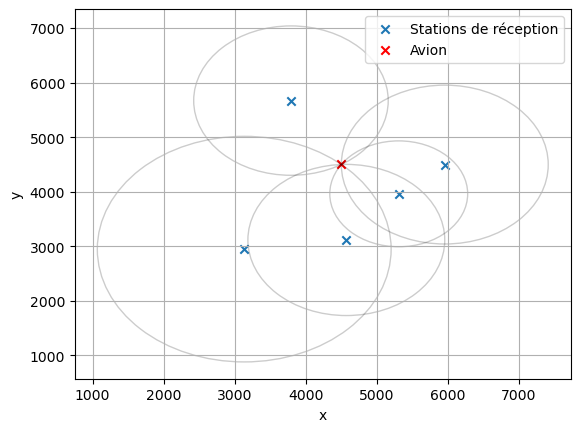

In [6]:
if n_dim == 2:
    fig, ax = plt.subplots()
    ax.scatter(stations_pos[:, 0], stations_pos[:, 1], marker='x', label="Stations de réception")
    ax.scatter(plane_pos[0], plane_pos[1], marker='x', label="Avion", color='red')

    for i in range(n_stations):
        circ = Circle((stations_pos[i, 0], stations_pos[i, 1]), radius=distances[i], fill=False, alpha=0.2)
        ax.add_patch(circ)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()
else:
    print("Pas de visualisation pour le cas 3D!")

#### Simulation des timestamps

In [7]:
t_e = time.time()
timestamps = distances / c + t_e + np.random.randn(n_stations) * prec_timestamp

#### Choix de la station de référence

In [8]:
i_ref = np.argmin(timestamps) # index de la première station à recevoir le message
pos_ref = stations_pos[i_ref,:]

print("Station de référence: ", i_ref)
print("Position de la station de référence: ", pos_ref)

Station de référence:  4
Position de la station de référence:  [5307.72461236 3962.22021599]


#### Calcul du vecteur TDOA ($\tau$)

In [9]:
stations_pos2 = np.delete(stations_pos, (i_ref), axis=0) # tau n'est défini que pour i != i_ref
tdoa = np.delete(timestamps-timestamps[i_ref], (i_ref))  # donc on retire la ligne correspondant à i_ref

#### Préparation du système d'équations linéaires à partir des mesures

In [10]:
A = -2 * np.c_[stations_pos2 - pos_ref, c*tdoa]
b = (c ** 2) * (tdoa ** 2) - (np.linalg.norm(stations_pos2, axis=1) ** 2) + (np.linalg.norm(pos_ref) ** 2) 

#### Résolution

Pour la résolution de Ax=b, on utilise la Pseudo-inverse de Moore-Penrose

In [11]:
x =  np.matmul(np.linalg.pinv(A), b)
plane_pos_estim, d1 = x[:-1], x[-1]
print("Position estimée de l'avion: ", plane_pos_estim)

Position estimée de l'avion:  [4393.95869613 4432.65336705]


#### Affichage des résultats

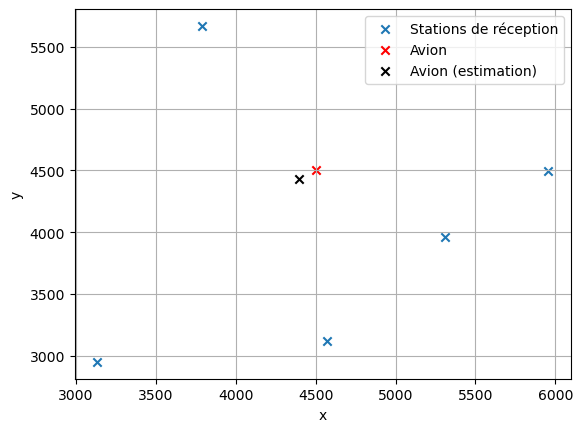

In [12]:
if n_dim == 2:
    fig, ax = plt.subplots()
    ax.scatter(stations_pos[:, 0], stations_pos[:, 1], marker='x', label="Stations de réception")
    ax.scatter(plane_pos[0], plane_pos[1], marker='x', label="Avion", color='red')
    ax.scatter(plane_pos_estim[0], plane_pos_estim[1], marker='x', label="Avion (estimation)", color='black')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()
else:
    print("Pas de visualisation pour le cas 3D!")